In [33]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [34]:
# Scrape a single match shots
base_url = 'https://understat.com/match/'
# Type the match id
#match = str(input('Please enter the match id: '))
match = '15716'
url = base_url+match

In [35]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts = soup.find_all('script')

In [36]:
#get only the shotsData
strings = scripts[1].string

In [37]:
strings[0:1000]

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22414815\\x22,\\x22minute\\x22\\x3A\\x2225\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.9130000305175782\\x22,\\x22Y\\x22\\x3A\\x220.49\\x22,\\x22xG\\x22\\x3A\\x220.05490456894040108\\x22,\\x22player\\x22\\x3A\\x22Mart\\x5Cu00edn\\x20C\\x5Cu00e1ceres\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x221942\\x22,\\x22situation\\x22\\x3A\\x22SetPiece\\x22,\\x22season\\x22\\x3A\\x222020\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x2215716\\x22,\\x22h_team\\x22\\x3A\\x22Fiorentina\\x22,\\x22a_team\\x22\\x3A\\x22Atalanta\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x223\\x22,\\x22date\\x22\\x3A\\x222021\\x2D04\\x2D11\\x2018\\x3A45\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Cristiano\\x20Biraghi\\x22,\\x22lastAction\\x22\\x3A\\x22Aerial\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22414816\\x22,\\x22minute\\x22\\x3A\\x2226\\x22,\\x22r

In [38]:
# Strip unnecessary symbols and get only JSON data 
str_start = strings.index("('")+2 
str_end = strings.index("')") 
json_data = strings[str_start:str_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to JSON
data = json.loads(json_data)

In [39]:
# The JSON consists of home (h) and away (a) objects

data['h'][0]

{'id': '414815',
 'minute': '25',
 'result': 'MissedShots',
 'X': '0.9130000305175782',
 'Y': '0.49',
 'xG': '0.05490456894040108',
 'player': 'Martín Cáceres',
 'h_a': 'h',
 'player_id': '1942',
 'situation': 'SetPiece',
 'season': '2020',
 'shotType': 'Head',
 'match_id': '15716',
 'h_team': 'Fiorentina',
 'a_team': 'Atalanta',
 'h_goals': '2',
 'a_goals': '3',
 'date': '2021-04-11 18:45:00',
 'player_assisted': 'Cristiano Biraghi',
 'lastAction': 'Aerial'}

In [40]:
# The JSON consists of home (h) and away (a) objects

data['a'][0]

{'id': '414809',
 'minute': '0',
 'result': 'MissedShots',
 'X': '0.7290000152587891',
 'Y': '0.4420000076293945',
 'xG': '0.018102940171957016',
 'player': 'Ruslan Malinovskiy',
 'h_a': 'a',
 'player_id': '7947',
 'situation': 'OpenPlay',
 'season': '2020',
 'shotType': 'LeftFoot',
 'match_id': '15716',
 'h_team': 'Fiorentina',
 'a_team': 'Atalanta',
 'h_goals': '2',
 'a_goals': '3',
 'date': '2021-04-11 18:45:00',
 'player_assisted': 'Marten de Roon',
 'lastAction': 'Pass'}

In [41]:
# Separate home and away teams into different DataFrames

from pandas import json_normalize

data_all = json_normalize(data, sep = "_")
data_home = json_normalize(data['h'], sep = "_")
data_away = json_normalize(data['a'], sep = "_")

In [42]:
data_away.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,414809,0,MissedShots,0.7290000152587891,0.4420000076293945,0.018102940171957016,Ruslan Malinovskiy,a,7947,OpenPlay,2020,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Marten de Roon,Pass
1,414810,12,Goal,0.919000015258789,0.47400001525878904,0.041996996849775314,Duván Zapata,a,1148,FromCorner,2020,Head,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Ruslan Malinovskiy,Aerial
2,414811,14,SavedShot,0.9259999847412109,0.38599998474121094,0.028611619025468826,Robin Gosens,a,6155,FromCorner,2020,Head,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Ruslan Malinovskiy,Cross
3,414812,14,MissedShots,0.9019999694824219,0.345,0.059671204537153244,Robin Gosens,a,6155,FromCorner,2020,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,None,Rebound
4,414813,18,BlockedShot,0.7330000305175781,0.5,0.05375939980149269,Ruslan Malinovskiy,a,7947,DirectFreekick,2020,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,None,Standard


In [43]:
#df['cum_away_shots'] = df['away_shots'].cumsum()
#df["A"] = pd.to_numeric(df["A"], downcast="float")

#Converting from string to float
data_home['xG'] = pd.to_numeric(data_home['xG'], downcast="float")
data_away['xG'] = pd.to_numeric(data_away['xG'], downcast="float")

#Converting from string to int
data_home['minute'] = pd.to_numeric(data_home['minute'], downcast="integer")
data_away['minute'] = pd.to_numeric(data_away['minute'], downcast="integer")

#Getting a column with cumulative result
data_home['cumsum_xg'] = data_home['xG'].cumsum()
data_away['cumsum_xg'] = data_away['xG'].cumsum()

In [44]:
data_home.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,414815,25,MissedShots,0.9130000305175782,0.49,0.054905,Martín Cáceres,h,1942,SetPiece,...,Head,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Cristiano Biraghi,Aerial,0.054905
1,414816,26,MissedShots,0.85,0.4859999847412109,0.050245,Dusan Vlahovic,h,7084,OpenPlay,...,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Christian Kouamé,HeadPass,0.105149
2,414818,36,MissedShots,0.8490000152587891,0.6809999847412109,0.038079,Dusan Vlahovic,h,7084,OpenPlay,...,RightFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Cristiano Biraghi,TakeOn,0.143229
3,414820,46,MissedShots,0.8130000305175781,0.375,0.046842,Gaetano Castrovilli,h,7909,OpenPlay,...,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Nikola Milenkovic,Pass,0.190071
4,414821,48,BlockedShot,0.8690000152587891,0.3609999847412109,0.071472,Christian Kouamé,h,7091,OpenPlay,...,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Dusan Vlahovic,Pass,0.261543


In [45]:
data_away.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,414809,0,MissedShots,0.7290000152587891,0.4420000076293945,0.018103,Ruslan Malinovskiy,a,7947,OpenPlay,...,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Marten de Roon,Pass,0.018103
1,414810,12,Goal,0.919000015258789,0.47400001525878904,0.041997,Duván Zapata,a,1148,FromCorner,...,Head,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Ruslan Malinovskiy,Aerial,0.060100
2,414811,14,SavedShot,0.9259999847412109,0.38599998474121094,0.028612,Robin Gosens,a,6155,FromCorner,...,Head,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,Ruslan Malinovskiy,Cross,0.088712
3,414812,14,MissedShots,0.9019999694824219,0.345,0.059671,Robin Gosens,a,6155,FromCorner,...,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,None,Rebound,0.148383
4,414813,18,BlockedShot,0.7330000305175781,0.5,0.053759,Ruslan Malinovskiy,a,7947,DirectFreekick,...,LeftFoot,15716,Fiorentina,Atalanta,2,3,2021-04-11 18:45:00,None,Standard,0.202142


In [46]:
# Creating a df with the data we need only
home_df = data_home[['minute', 'cumsum_xg']]
away_df = data_away[['minute', 'cumsum_xg']]

# Creating objects for home/away minutes and xG
# Setting the 1st elements to zero, so the step chart start from zero position in both teams
h_min = [0]
a_min = [0]
h_xg = [0.0]
a_xg = [0.0]

# Adding to the lists above all the minutes and xG for home team
for x in range(len(home_df['minute'])):
    h_xg.append(home_df['cumsum_xg'].iloc[x])
    h_min.append(home_df['minute'].iloc[x])

# Adding to the lists above all the minutes and xG for away team
for x in range(len(away_df['minute'])):
    a_xg.append(away_df['cumsum_xg'].iloc[x])
    a_min.append(away_df['minute'].iloc[x])


In [47]:
a_xg, a_min

([0.0,
  0.01810294,
  0.060099937,
  0.08871156,
  0.14838277,
  0.20214216,
  0.47896332,
  0.7546134,
  1.1775999,
  1.2295558,
  1.3040013,
  1.6912497,
  2.4525485,
  2.5146697,
  2.8708558,
  3.1100855],
 [0, 0, 12, 14, 14, 18, 18, 29, 39, 58, 59, 59, 69, 77, 82, 84])

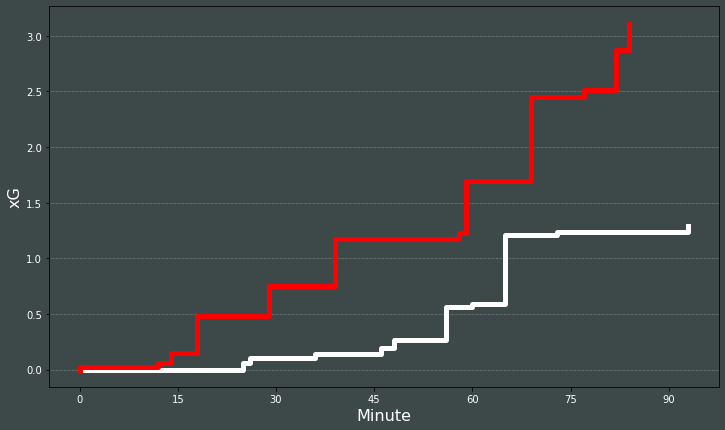

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

plt.xticks([0,15,30,45,60,75,90], color='white')
plt.yticks(color='white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)

'''
#plot the step graphs
ax.step(x=data_home['minute'],y=data_home['cumsum_xg'],color='white',linewidth=5)
ax.step(x=data_away['minute'],y=data_away['cumsum_xg'],color='red',linewidth=5)
'''

# Passing our lists to step object to plot the chart
ax.step(x=h_min,y=h_xg,color='white',linewidth=5, where='post')
ax.step(x=a_min,y=a_xg,color='red',linewidth=5, where='post') #check the where option


#plt.step(h_min, h_xg)
#plt.step(a_min, a_xg)